## Mobility of a sedimenting lattice as a function of volume fraction

In [1]:
import matplotlib.pyplot as plt 
import numpy as np
import solvePeriodic
# import directSolvePeriodic
# import matrixPeriodic_Real as me
# import matrixM2r0 as m2
#import testG3s3s as test
from math import *
PI = 3.14159265359

In [2]:
#Parameters
Np=1
b, eta, dim = 1.0, 1.0, 3
ta =(4*np.pi/3)**(1.0/3) 
L = ta/np.asarray([0.1, 0.3, 0.4, 0.5, 0.6, 0.7, 0.7663094323935531, 0.8059966052641452])

# Memory allocation
v = np.zeros(dim*Np)      
o = np.zeros(dim*Np)  
r = np.zeros(dim*Np)        
F = np.zeros(dim*Np)
T = np.zeros(dim*Np)  
vv  = np.zeros(np.size(L))
phi = np.zeros(np.size(L) )

S = np.zeros(Np*5)
D = np.zeros(Np*3)

mu=1.0/(6*np.pi*eta*b)

In [3]:
#(0.5236*3/(4*np.pi*b**3))**(1/3)*ta ##reverse engineer above numbers in L= ta/array()

In [4]:
L

array([16.11991954,  5.37330651,  4.02997989,  3.22398391,  2.68665326,
        2.30284565,  2.10357838,  1.99999844])

In [5]:
(4*np.pi*b**3)/(3*L**3)

array([0.001 , 0.027 , 0.064 , 0.125 , 0.216 , 0.343 , 0.45  , 0.5236])

In [6]:
# phi = (4*np.pi*b**3)/(3*L**3)
# phi

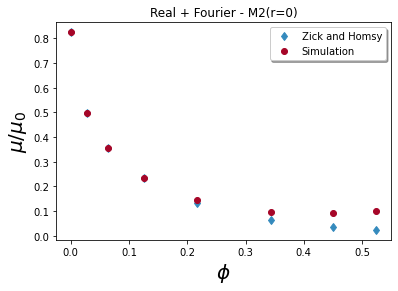

volume fraction   simulation	 Zick & Homsy (1982)
0.001		  0.825		 0.825	
0.027		  0.498		 0.498	
0.064		  0.356		 0.356	
0.125		  0.236		 0.233	
0.216		  0.144		 0.134	
0.343		  0.096		 0.065	
0.450		  0.092		 0.036	
0.524		  0.100		 0.024	


In [7]:
# Deafult value of xi = sqrt(pi)/L
b=1.

# L=np.linspace(2.,10.)

vv  = np.zeros(np.size(L))
phi = np.zeros(np.size(L) )

S = np.zeros(5)
D = np.zeros(3)

phi = (4*np.pi*b**3)/(3*L**3)


for i in range(np.size(L)):
    v = v*0
    F = F*0

    r[0], r[1], r[2] = 0.0, 0.0, 0.0

    F[2] = -1  ## gravity                           
    
    Rbm = solvePeriodic.Rbm(b, eta, L[i], xi=sqrt(pi)/L[i])   
    Rbm.krylovSolve(v, o, F, T, S, D)

    mu00 = mu*F[2]
    vv[i] = v[2]/mu00
    

exR = [.825, .498, .356, .233, .134, .065, 0.036, 0.024]
plt.title('Real + Fourier - M2(r=0)')
plt.plot(phi, exR, 'd', color="#348ABD", label='Zick and Homsy')
plt.plot(phi, vv, 'o', color="#A60628", label='Simulation')

plt.xlabel(r'$\phi$', fontsize=20); plt.ylabel(r'$\mu/\mu_0$', fontsize=20)
plt.legend(loc='upper right', shadow=True)
plt.show()

print ('volume fraction   simulation\t Zick & Homsy (1982)')
for i in range(np.size(L)):
    print ('%1.3f\t\t  %1.3f\t\t %1.3f\t'%(phi[i], vv[i], exR[i] ))

In [8]:
v

array([ 0.        ,  0.        , -0.00552231])

In [ ]:
volume fraction   simulation	 Zick & Homsy (1982)
0.001		  0.825		 0.825	
0.027		  0.498		 0.498	
0.064		  0.357		 0.356	
0.125		  0.237		 0.233	
0.216		  0.146		 0.134	
0.343		  0.099		 0.065	
0.450		  0.096		 0.036	
0.524		  0.104		 0.024	

In [9]:
## symmetric interval of wave vectors in Fourier space is better. 
## Exactly zero x-y components of velocity and ever so slightly better result (might be because 5 instead of 4 Fourier modes are used
## Asymmetric and 6 modes is actually as good, so only advantage of symmetric interval is zero x-y components of velocity

In [ ]:
## why does large xi not reproduce Hasimoto's Green's function? 
## First, have to subtract M2(r=0), but still not exactly the same. why? 
## now it matches - was a factor of 4 pi**2 too much in other solution. Make sure all the factors are correct? 8 pi eta etc...

In [ ]:
## More Fourier modes (without M2(r=0)) screws things up (i.e., goes negative) - but M2(r=0) fixes things again. --> Need M2(r=0) to rectify things!
## M2(r=0) not dependent on number of modes - how does it rectify Fourier modes? Or is contribution from Fourier modes just tiny because of xi? 
## Try to run more boxes: Nb=2 - will take ages - if it scales linearly, about 5 times as long ca 20 hours. 

## Literally no difference between 5 and 9 Fourier modes, but can tell the difference when xi is large and M2(r=0) is ignored. 
## For v large xi with M2(r=0) exactly the same result - are Fourier modes even important? Fourier + M2(r=0) does make a difference. 

In [ ]:
## Just using G1s1sF is worse for all, but actually for last three values the difference is not that big. --> Because FH actually gets weaker for
## closest three packings. Why?? 
## Any additional terms adding to FH or influence of FH? 

In [ ]:
volume fraction   simulation	 Zick & Homsy (1982) ## for Nm=6
0.001		  0.825		 0.825	
0.027		  0.498		 0.498	
0.064		  0.356		 0.356	
0.125		  0.236		 0.233	
0.216		  0.144		 0.134	
0.343		  0.096		 0.065	
0.450		  0.092		 0.036	
0.524		  0.100		 0.024	

In [ ]:
volume fraction   simulation	 Zick & Homsy (1982)  ## for Nm=4
0.001		  0.825		 0.825	
0.027		  0.498		 0.498	
0.064		  0.356		 0.356	
0.125		  0.236		 0.233	
0.216		  0.145		 0.134	
0.343		  0.097		 0.065	
0.450		  0.094		 0.036	
0.524		  0.102		 0.024	

In [ ]:
volume fraction   simulation	 Zick & Homsy (1982) ## superposition Nm=4 
0.001		  0.825		 0.825	
0.027		  0.499		 0.498	
0.064		  0.360		 0.356	
0.125		  0.245		 0.233	
0.216		  0.159		 0.134	
0.343		  0.110		 0.065	
0.450		  0.100		 0.036	
0.524		  0.104		 0.024	

In [7]:
len(GHH)

8

In [8]:
np.linalg.cond(GHH)

array([ 30.18540707,  33.71176197,  35.19239408,  28.87020986,
        12.3849708 , 567.25105037,  38.96432618,  24.93022824])

In [16]:
##G3s3s is not symmetric in matrix form, is that to be expected?? 

In [17]:
## condition number of GHH alone horrible
## GoHH obviously improves things, as it ads diagonal elements (do we need the off-diag elements in GoHH?)
## M2(r=0) itself is not invertible, does that make sense? 

In [18]:
for i in range(len(GHH)):
    print(np.linalg.norm(GHH[i])) ##GHH is the problem, not GH1s or G1sH

0.5484147575149751
0.5329177322229312
0.5241993853169308
0.5208137618615843
0.5214909476072649
0.525163326649123
0.5309660016477573
0.5382191652834978
0.5464013887707942
0.5551207310538864
0.5640877837674968
0.5730925183031289
0.5819853835716201
0.5906623672834584
0.5990534364210506
0.6071137151550745
0.6148168125035703
0.6221498058739032
0.6291094848243972
0.6356995469164963
0.641928509803035
0.6478081608929376
0.653352410072783
0.6585764445200887
0.6634961099233648
0.6681274613757328
0.6724864413831464
0.6765886530231674
0.6804492042143729
0.6840826049911668
0.6875027041316623
0.6907226548344401
0.6937549016630181
0.6966111828823096
0.6993025437533643
0.7018393574460374
0.7042313510595543
0.7064876348722979
0.708616733422636
0.7106266173883895
0.7125247355109664
0.7143180460218912
0.7160130471901802
0.7176158067306806
0.7191319899052261
0.7205668862172617
0.721925434651775
0.7232122474500813
0.724431632436376
0.7255876139324547
